In [1]:
import pandas as pd
import numpy as np 
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for evaluation
from sklearn.metrics import mean_absolute_error, r2_score, classification_report,confusion_matrix , accuracy_score, f1_score
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('/content/data_epilepsy.xlsx',sheet_name='S-O-F')
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 4057,Unnamed: 4058,Unnamed: 4059,Unnamed: 4060,Unnamed: 4061,Unnamed: 4062,Unnamed: 4063,Unnamed: 4064,Unnamed: 4065,Unnamed: 4066,Unnamed: 4067,Unnamed: 4068,Unnamed: 4069,Unnamed: 4070,Unnamed: 4071,Unnamed: 4072,Unnamed: 4073,Unnamed: 4074,Unnamed: 4075,Unnamed: 4076,Unnamed: 4077,Unnamed: 4078,Unnamed: 4079,Unnamed: 4080,Unnamed: 4081,Unnamed: 4082,Unnamed: 4083,Unnamed: 4084,Unnamed: 4085,Unnamed: 4086,Unnamed: 4087,Unnamed: 4088,Unnamed: 4089,Unnamed: 4090,Unnamed: 4091,Unnamed: 4092,Unnamed: 4093,Unnamed: 4094,Unnamed: 4095,Unnamed: 4096
0,100,124,153,185,210,220,216,222,240,265,298,330,362,381,391,390,390,392,395,397,397,393,380,356,334,322,320,322,338,332,317,263,195,142,108,97,80,80,85,39,...,516,592,650,667,637,574,505,450,413,399,414,448,486,449,291,-46,-457,-878,-1178,-1324,-1310,-1105,-770,-345,42,315,465,513,478,378,250,137,57,17,0,7,26,57,95,462
1,340,353,400,470,538,590,611,629,649,693,759,837,812,684,389,-231,-1250,-1768,-1816,-1637,-984,-476,-224,-14,165,314,408,454,467,437,412,379,376,339,302,248,200,174,144,152,...,304,254,82,-174,-467,-537,-450,-178,64,274,464,496,571,467,299,130,28,82,270,597,886,1071,1166,1146,1000,773,423,118,-75,-18,205,556,824,919,916,829,722,512,130,196
2,-310,93,494,789,798,552,202,-95,-262,-327,-420,-483,-508,-502,-459,-376,-266,-113,18,98,135,154,163,174,186,196,208,216,218,208,200,197,197,201,211,224,239,246,252,261,...,-21,-12,29,75,111,145,168,169,150,113,106,137,204,291,388,477,546,574,546,467,360,255,164,123,126,184,312,410,470,496,437,345,108,-216,-525,-735,-847,-721,-491,910
3,84,75,21,-68,-138,-184,-197,-186,-155,-111,-58,-26,-18,-18,-40,-56,-35,35,149,253,298,282,232,161,96,71,64,70,35,-45,-116,-169,-192,-196,-173,-131,-82,-38,-8,-4,...,-91,-191,-246,-261,-248,-228,-197,-172,-150,-133,-123,-113,-109,-93,-71,-54,-42,-32,-17,29,110,200,271,285,236,142,50,-15,-61,-83,-119,-148,-171,-195,-218,-234,-238,-209,-165,-212
4,343,311,284,274,260,237,165,-33,-271,-425,-418,-254,-104,-14,16,24,23,11,4,20,40,67,99,127,130,126,133,124,108,54,-5,-45,-61,-65,-52,-46,-25,-15,-4,-12,...,2,-70,-118,-155,-201,-283,-368,-363,-333,-271,-203,-126,-31,48,86,102,124,125,132,144,187,263,343,411,433,417,397,395,414,435,439,428,423,430,472,515,527,480,397,217


In [5]:
target = pd.read_excel('/content/data_epilepsy.xlsx',sheet_name='target S-O-F')

##PCA

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_data = scaler.transform(df)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=3)

In [10]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
x_pca = pca.transform(scaled_data)

In [12]:
scaled_data.shape

(300, 4097)

In [13]:
x_pca.shape

(300, 3)

Text(0, 0.5, 'Second principal component')

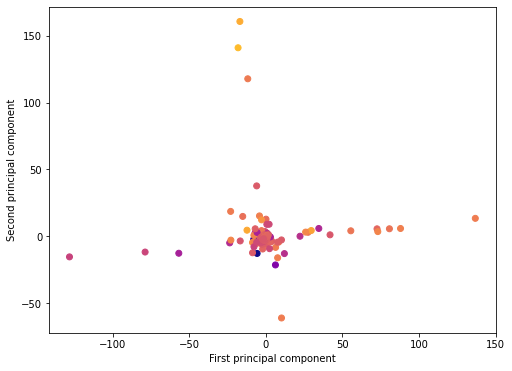

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Unnamed: 19'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [15]:
x=df.iloc[:,0:]
y=target

In [ ]:
from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test =train_test_split(x,y,train_size =.8)

#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
import numpy as np
from sklearn.utils.multiclass import is_multilabel

In [ ]:
model.fit(x_Train,y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()


# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(x_Train, y_Train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3}
Best score is 0.6291666666666667


In [ ]:
y_pred = tree_cv.predict(x_Test)
y_pred

array([0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1,
       0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.7166666666666667


In [ ]:
dtc_acc = accuracy_score(y_Test,y_pred)
print(dtc_acc)

0.7166666666666667


In [ ]:
results = pd.DataFrame()
results

""


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Decision tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.716667


##Logistic Regression

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 9, 13)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 6)
  
logreg_cv.fit(x_Train, y_Train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.6124999999999999


In [ ]:
y_pred = logreg_cv.predict(x_Test)

In [ ]:
y_pred

array([0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2])

In [ ]:
y_Test

,target
120,0
26,1
195,0
247,2
158,0
209,2
226,2
296,2
44,1
216,2


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.6166666666666667


In [ ]:
lr_acc = accuracy_score(y_Test, y_pred)
print(lr_acc)

0.6166666666666667


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.716667
0,Logistic Regression Method,0.616667


#SVM-Linear

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_Train, y_Train)

#Predict the response for test dataset
y_pred = clf.predict(x_Test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[10,  0,  6],
       [ 9,  9,  5],
       [ 1,  0, 20]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.65


In [ ]:
svm_lin_acc = accuracy_score(y_Test,y_pred)
print(svm_lin_acc)

0.65


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['SVM-Linear Karnel Classifier Method'], 'Accuracy':[svm_lin_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.716667
0,Logistic Regression Method,0.616667
0,SVM-Linear Karnel Classifier Method,0.650000


#KNN

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,4,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(x_Train, y_Train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
# Predicting the Test set results
y_pred = model1.predict(x_Test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[ 0,  0, 16],
       [ 2,  4, 17],
       [ 0,  0, 21]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.4166666666666667


In [ ]:
knn_acc = accuracy_score(y_Test, y_pred)
print(knn_acc)

0.4166666666666667


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['KNN Classifier Method'], 'Accuracy':[knn_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.716667
0,Logistic Regression Method,0.616667
0,SVM-Linear Karnel Classifier Method,0.650000
0,KNN Classifier Method,0.416667


##RandomForest

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.datasets import make_classification
xTrain, yTrain = make_classification(n_samples=1000, n_features=4097,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xTrain, yTrain)
RandomForestClassifier(...)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=Ellipsis,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)

[0.00878617 0.01414803 0.         ... 0.         0.         0.        ]


In [ ]:
y_pred = clf.predict(x_Test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
accuracy_score(y_Test, y_pred)

0.3

In [ ]:
rfc_acc = accuracy_score(y_Test,y_pred)
print(rfc_acc)

0.3


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.716667
0,Logistic Regression Method,0.616667
0,SVM-Linear Karnel Classifier Method,0.650000
0,KNN Classifier Method,0.416667
0,Random Forest Classifier Method,0.300000


#XGBoost

In [16]:
from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test =train_test_split(x,y,train_size =.7, random_state = 4242)

In [17]:
import numpy as np
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score

from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [18]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(x_Train, y_Train)

y_pred = xgb_model.predict(x_Test)

print(confusion_matrix(y_Test, y_pred))

[[16  0 13]
 [ 3 26  1]
 [ 4  0 27]]


In [ ]:

x_Train, x_valid, y_Train, y_valid = train_test_split(x_Train, y_Train, test_size=0.3, random_state=4242)
x_Train = xgb.DMatrix(x_Train, label=y_Train)
y_valid = xgb.DMatrix(x_valid, label=y_valid)
watchlist = [(y_valid,'eval'),(x_Train,'train')]
clf = xgb.train(x_Train, 200, watchlist, early_stopping_rounds=50, verbose_eval=True)

TypeError: ignored

In [ ]:
params = {}
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'map@5'
params['num_class'] = 100
params['tree_method'] = 'exact'
params['silent'] = 0

x_Train, x_valid, y_Train, y_valid = train_test_split(x_Train, y_Train, test_size=0.9, random_state=4500)
d_train = xgb.DMatrix(x_Train, label=y_Train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
watchlist = [(d_valid,'eval'),(d_train,'train')]
clf = xgb.train(params, d_train, 200, watchlist, early_stopping_rounds=50, verbose_eval=True)

ValueError: ignored

In [ ]:
model =XGBClassifier()
eval_set =[(x_Train,y_Train)]
model.fit(x_Train,y_Train,early_stopping_rounds=100, eval_metric ='logloss',eval_set=eval_set,verbose=True)

XGBoostError: ignored

In [ ]:
#make predictions for test data
predictions = model.predict(x_Test)


XGBoostError: ignored

In [ ]:
y_xgb_pred =model.predict(x_Test)
print(y_Test)
print(y_xgb_pred)

cm = confusion_matrix(y_xgb_pred,y_Test)
print(cm)

In [ ]:
# evoluate predictions
accuracy = accuracy_score(y_Test, predictions)
print("Accuracy: %.2f%%" %(accuracy * 100.0))

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

In [ ]:
xgb_acc = accuracy_score(y_Test, y_pred)
print(xgb_acc)

NameError: ignored

In [ ]:
tempResults = pd.DataFrame({'Algorithm':['XGBoost Classifier Method'], 'Accuracy':[xgb_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

NameError: ignored

##Perform Kmean Clustering

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [ ]:
# Scale the Dataset
df_scaled = df.apply(zscore)

In [ ]:
# Let us check optimal number of clusters-

# expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2) 
  clusters.fit(df_scaled)
 
    # capture the cluster lables
  labels = clusters.labels_

# capture the centroids
  centroids = clusters.cluster_centers_

    # capture the intertia
  cluster_errors.append( clusters.inertia_ )

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

In [ ]:
# Number of clusters
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [ ]:
# Fitting the input data
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [ ]:
#Centroids
centroids=kmeans.cluster_centers_

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [ ]:
centroid_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 4057,Unnamed: 4058,Unnamed: 4059,Unnamed: 4060,Unnamed: 4061,Unnamed: 4062,Unnamed: 4063,Unnamed: 4064,Unnamed: 4065,Unnamed: 4066,Unnamed: 4067,Unnamed: 4068,Unnamed: 4069,Unnamed: 4070,Unnamed: 4071,Unnamed: 4072,Unnamed: 4073,Unnamed: 4074,Unnamed: 4075,Unnamed: 4076,Unnamed: 4077,Unnamed: 4078,Unnamed: 4079,Unnamed: 4080,Unnamed: 4081,Unnamed: 4082,Unnamed: 4083,Unnamed: 4084,Unnamed: 4085,Unnamed: 4086,Unnamed: 4087,Unnamed: 4088,Unnamed: 4089,Unnamed: 4090,Unnamed: 4091,Unnamed: 4092,Unnamed: 4093,Unnamed: 4094,Unnamed: 4095,Unnamed: 4096
0,1.284267,-2.031725,-4.689536,-5.672939,-4.993369,-2.307500,1.330278,3.855793,5.016986,5.108701,4.733688,4.054601,2.463983,0.170125,-2.290724,-3.881493,-3.147774,-0.871480,1.693864,3.207923,3.929427,3.853776,3.179506,2.639978,2.504775,2.685742,2.798995,2.682670,2.344897,1.798668,1.081734,0.420021,-0.018848,-0.126485,0.075816,0.294100,0.300346,0.160173,0.150135,0.344380,...,-0.197932,0.328395,1.199099,2.051018,2.678037,2.919625,2.863076,2.774522,2.395564,2.028045,1.964164,2.104206,2.450722,2.533687,2.186307,1.014988,-1.286645,-4.333097,-6.700524,-7.430926,-7.239560,-5.346491,-1.183531,2.867897,5.046966,5.626138,4.196518,0.070828,-3.825247,-5.006503,-4.236859,-2.055966,0.612207,2.497618,3.514092,4.095029,4.330173,4.426603,4.403947,-1.045617
1,5.537945,5.206952,4.642678,4.450854,4.818518,5.700639,6.381829,6.746414,6.487813,5.988446,3.657779,-1.249528,-7.052612,-9.218162,-9.435925,-9.593548,-10.105201,-10.137896,-9.346567,-7.507119,-5.780829,-4.126760,-2.688628,-1.320681,0.138893,1.413712,2.524545,3.236441,3.962798,4.337678,4.509552,4.300645,4.258937,4.328252,4.155974,4.069391,3.923728,3.689368,3.509717,3.384611,...,-1.907208,-2.732780,-3.155452,-2.982154,-1.534514,-0.349310,1.630459,2.745251,3.527146,2.558984,1.106084,-1.095486,-2.356490,-1.567008,1.099556,4.352488,6.245712,5.923992,5.292340,4.797334,4.611357,4.400862,2.087819,-0.297872,-1.767015,-1.350061,0.669965,3.698471,5.260168,5.343191,5.047102,4.739822,3.865039,1.688897,-1.347806,-3.569541,-4.599954,-4.511281,-2.476041,-3.040295
2,-0.018933,0.001791,0.019004,0.025339,0.020487,0.002463,-0.020913,-0.036923,-0.043425,-0.042973,-0.036006,-0.022005,-0.000684,0.017556,0.032879,0.042819,0.039412,0.025710,0.008599,-0.004267,-0.012112,-0.014989,-0.013810,-0.013305,-0.015430,-0.019095,-0.022019,-0.022751,-0.022172,-0.019624,-0.015635,-0.011211,-0.008473,-0.007961,-0.008838,-0.009983,-0.009727,-0.008407,-0.007984,-0.008907,...,0.005042,0.003523,-0.000891,-0.006393,-0.013104,-0.016955,-0.020604,-0.022316,-0.021600,-0.017426,-0.014110,-0.010518,-0.010072,-0.012165,-0.015440,-0.014914,-0.004810,0.014265,0.029857,0.035273,0.034491,0.023465,0.002949,-0.016746,-0.026963,-0.031307,-0.026733,-0.007885,0.012531,0.019509,0.015451,0.002879,-0.011495,-0.018512,-0.018537,-0.017572,-0.016916,-0.017678,-0.021645,0.012454


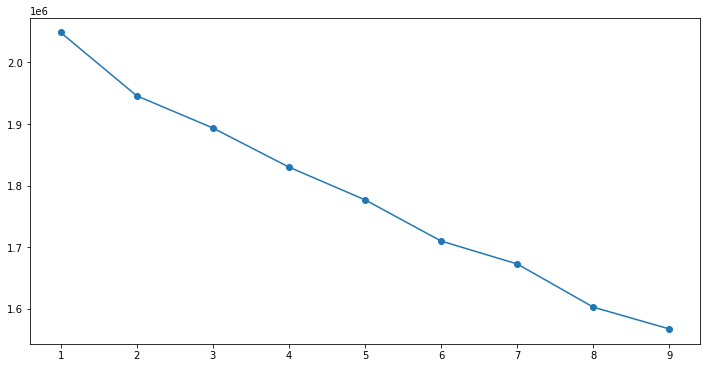

In [ ]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

#Feature importance using XGBoost

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

In [ ]:
# plot feature importance
plot_importance(model)
pyplot.show()

#XGBoost trees diagram

In [ ]:
# plot_tree in xgboost gives a pictorial representation of the trees made
import xgboost as xgb
plt.figure(figsize=(20,15))
xgb.plot_tree(model,ax=plt.gca());

In [ ]:
clusters = kmeans.clusters_centers_
# print out the clusters 
print(clusters)

In [ ]:
y_km= kmeans.fit_predict(points)

In [ ]:
y_km

In [ ]:
plt.scatter(points[y_km == 0,0], points[y_km== 0,1] s =50,color ='red')
plt.scatter(points[y_km == 1,0], points[y_km== 1,1] s =50,color ='green')
plt.scatter(points[y_km == 2,0], points[y_km== 2,1] s =50,color ='yellow')
plt.scatter(points[y_km == 3,0], points[y_km== 3,1] s =50,color ='cyan')
plt.scatterplt.show()